**Step 1: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS**

In [1]:
import numpy as np # Multi-dimensional array manipulation
import pandas as pd # DataFrame Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn import metrics

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd "/content/drive/MyDrive/coe64-343/"

/content/drive/MyDrive/coe64-343


In [5]:
# Read the CSV file
df = pd.read_csv("shopping_trends.csv")

In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [7]:
df.shape

(3902, 19)

In [8]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,550,Male,Blouse,Clothing,$53.00,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,NaN,Yes,14,Venmo,Fortnightly
1,2,19,NaN,Sweater,Clothing,$64.00,Maine,L,Maroon,wigter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,$73.00,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,NaN,NaN,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,$90.00,Rhode Island,M,Maroon,Spring,3.5,Yes,"""PayPal""",Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,$49.00,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
df.dtypes

Customer ID                   int64
Age                          object
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)        object
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

** lec 1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3902 non-null   int64  
 1   Age                       3902 non-null   object 
 2   Gender                    3834 non-null   object 
 3   Item Purchased            3902 non-null   object 
 4   Category                  3902 non-null   object 
 5   Purchase Amount (USD)     3902 non-null   object 
 6   Location                  3902 non-null   object 
 7   Size                      3902 non-null   object 
 8   Color                     3902 non-null   object 
 9   Season                    3902 non-null   object 
 10  Review Rating             3902 non-null   float64
 11  Subscription Status       3902 non-null   object 
 12  Payment Method            3902 non-null   object 
 13  Shipping Type             3902 non-null   object 
 14  Discount

In [11]:
df.count()

Customer ID                 3902
Age                         3902
Gender                      3834
Item Purchased              3902
Category                    3902
Purchase Amount (USD)       3902
Location                    3902
Size                        3902
Color                       3902
Season                      3902
Review Rating               3902
Subscription Status         3902
Payment Method              3902
Shipping Type               3902
Discount Applied            3839
Promo Code Used             3836
Previous Purchases          3902
Preferred Payment Method    3902
Frequency of Purchases      3902
dtype: int64

In [12]:
df.describe()

,Customer ID,Review Rating,Previous Purchases
count,3902.000000,3902.000000,3902.000000
mean,1951.498975,3.749795,25.353152
std,1126.552930,0.716115,14.443956
min,1.000000,2.500000,1.000000
25%,976.250000,3.100000,13.000000
50%,1951.500000,3.700000,25.000000
75%,2926.750000,4.400000,38.000000
max,3900.000000,5.000000,50.000000


** lec 2

**# Step2: ให้ Check missing value และถ้าในกรณีที่มี missing value ให้เติมค่า Null ด้วย ค่า Mean (ในกรณีที่ข้อมูลเป็นตัวเลข)**

In [13]:
import numpy as np

np.NaN
pd.NA
None

In [14]:
df.dtypes

Customer ID                   int64
Age                          object
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)        object
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [15]:
df.isnull().sum()

Customer ID                  0
Age                          0
Gender                      68
Item Purchased               0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating                0
Subscription Status          0
Payment Method               0
Shipping Type                0
Discount Applied            63
Promo Code Used             66
Previous Purchases           0
Preferred Payment Method     0
Frequency of Purchases       0
dtype: int64

In [16]:
df.isna()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3900,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [17]:
# Rows with any NaNs
df[df.isna().any(axis=1)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,550,Male,Blouse,Clothing,$53.00,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,NaN,Yes,14,Venmo,Fortnightly
1,2,19,NaN,Sweater,Clothing,$64.00,Maine,L,Maroon,wigter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,$73.00,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,NaN,NaN,23,Credit Card,Weekly
7,8,27,NaN,Shorts,Clothing,$34.00,Louisiana,L,Charcoal,wigter,3.2,Yes,Debit Card,Free Shipping,NaN,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,$97.00,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,NaN,8,Venmo,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3898,46,Female,Belt,Accessories,$33.00,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,NaN,NaN,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,$77.00,Minnesota,S,Brown,Summer,3.8,No,"""PayPal""",Express,NaN,NaN,24,Venmo,Weekly
3899,3900,52y,Female,Handbag,Accessories,$81.00,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,NaN,NaN,33,Venmo,Quarterly
3900,3899,44,Female,Shoes,Footwear,$77.00,Minnesota,S,Brown,Summer,3.8,No,"""PayPal""",Express,NaN,NaN,24,Venmo,Weekly


In [18]:
# แทนที่ค่าที่หายไปในคอลัมน์ 'Discount Applied' ด้วย "NO"
df['Discount Applied'].fillna("NO", inplace=True)
# แทนที่ค่าที่หายไปในคอลัมน์ 'Promo Code Used' ด้วย "NO"
df['Promo Code Used'].fillna("NO", inplace=True)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,550,Male,Blouse,Clothing,$53.00,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,NO,Yes,14,Venmo,Fortnightly
1,2,19,NaN,Sweater,Clothing,$64.00,Maine,L,Maroon,wigter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,$73.00,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,NO,NO,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,$90.00,Rhode Island,M,Maroon,Spring,3.5,Yes,"""PayPal""",Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,$49.00,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3898,46,Female,Belt,Accessories,$33.00,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,NO,NO,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,$77.00,Minnesota,S,Brown,Summer,3.8,No,"""PayPal""",Express,NO,NO,24,Venmo,Weekly
3899,3900,52y,Female,Handbag,Accessories,$81.00,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,NO,NO,33,Venmo,Quarterly
3900,3899,44,Female,Shoes,Footwear,$77.00,Minnesota,S,Brown,Summer,3.8,No,"""PayPal""",Express,NO,NO,24,Venmo,Weekly


In [19]:
df.dropna(subset=['Gender'], inplace=True)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,550,Male,Blouse,Clothing,$53.00,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,NO,Yes,14,Venmo,Fortnightly
2,3,50,Male,Jeans,Clothing,$73.00,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,NO,NO,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,$90.00,Rhode Island,M,Maroon,Spring,3.5,Yes,"""PayPal""",Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,$49.00,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,$20.00,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,3898,46,Female,Belt,Accessories,$33.00,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,NO,NO,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,$77.00,Minnesota,S,Brown,Summer,3.8,No,"""PayPal""",Express,NO,NO,24,Venmo,Weekly
3899,3900,52y,Female,Handbag,Accessories,$81.00,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,NO,NO,33,Venmo,Quarterly
3900,3899,44,Female,Shoes,Footwear,$77.00,Minnesota,S,Brown,Summer,3.8,No,"""PayPal""",Express,NO,NO,24,Venmo,Weekly


In [20]:
df[df.Gender.isna()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


In [21]:
df.Age.value_counts()

69     87
25     85
57     85
41     84
54     83
       ..
550     1
42y     1
57y     1
61y     1
55y     1
Name: Age, Length: 62, dtype: int64

In [22]:
# ทำการแทนค่าในคอลัมน์ "Age" โดยลบตัวอักษร "y" ออก
df['Age'] = df['Age'].str.replace('y', '')

# แปลงค่าในคอลัมน์ "Age" ให้เป็นตัวเลข
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [23]:
df['Age'] = np.where(df['Age'] > 90, 90, df['Age'])
df.Age.value_counts()

69    87
57    86
25    85
41    84
54    83
50    82
49    82
62    82
58    81
27    81
32    80
19    79
42    79
28    79
43    78
37    76
46    76
31    76
29    75
52    74
36    74
68    74
63    73
64    73
59    72
45    72
51    72
56    72
23    71
47    71
38    70
40    70
30    70
35    70
55    69
66    69
18    69
21    68
24    67
53    67
26    66
34    66
48    66
39    66
65    66
22    65
61    65
60    64
70    64
20    62
33    62
67    53
44    50
90     1
Name: Age, dtype: int64

In [24]:
df['Payment Method'].value_counts()

Credit Card      685
Cash             639
Venmo            638
Debit Card       625
Bank Transfer    618
PayPal           607
"PayPal"          22
Name: Payment Method, dtype: int64

In [25]:
# ใช้ str.replace() เพื่อลบเครื่องหมาย " ในคอลัมน์ 'Payment Method'
df['Payment Method'] = df['Payment Method'].str.replace('"', '')
df['Payment Method'].value_counts()

Credit Card      685
Cash             639
Venmo            638
PayPal           629
Debit Card       625
Bank Transfer    618
Name: Payment Method, dtype: int64

In [26]:
df['Purchase Amount (USD)'].value_counts()

$94.00     61
$32.00     60
$51.00     60
$90.00     59
$36.00     59
           ..
$87.00     35
$100.00    35
$49.00     34
$61.00     33
$69.00     32
Name: Purchase Amount (USD), Length: 81, dtype: int64

In [27]:
# ใช้ str.replace() เพื่อลบเครื่องหมาย $ ในคอลัมน์ 'Payment Method'
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].str.replace('$', '')

# แปลงค่าในคอลัมน์ "Purchase Amount (USD)" ให้เป็นตัวเลข
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')
df['Purchase Amount (USD)'].value_counts()

<ipython-input-27-bff4b158c52f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].str.replace('$', '')


94.0     61
32.0     60
51.0     60
90.0     59
36.0     59
         ..
87.0     35
100.0    35
49.0     34
61.0     33
69.0     32
Name: Purchase Amount (USD), Length: 81, dtype: int64

In [28]:
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(int)

In [29]:
df['Purchase Amount (USD)'].value_counts()

94     61
32     60
51     60
90     59
36     59
       ..
87     35
100    35
49     34
61     33
69     32
Name: Purchase Amount (USD), Length: 81, dtype: int64

In [30]:
df['Review Rating'] = df['Review Rating'].astype(int)

In [31]:
df['Review Rating'].value_counts()

4    1548
3    1543
2     675
5      68
Name: Review Rating, dtype: int64

In [32]:
df['Season'].value_counts()

Spring    985
Fall      955
Summer    939
Winter    933
wigter     22
Name: Season, dtype: int64

In [33]:
# ใช้ str.replace() เพื่อเปลี่ยน wigter เป็น Winter ในคอลัมน์ 'Season'
df['Season'] = df['Season'].str.replace('wigter', 'Winter')

df['Season'].value_counts()

Spring    985
Winter    955
Fall      955
Summer    939
Name: Season, dtype: int64

In [34]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [35]:
df['Payment Method'].value_counts()

Credit Card      685
Cash             639
Venmo            638
PayPal           629
Debit Card       625
Bank Transfer    618
Name: Payment Method, dtype: int64

In [36]:
df['Preferred Payment Method'].value_counts()

PayPal           666
Cash             659
Credit Card      658
Debit Card       628
Venmo            621
Bank Transfer    602
Name: Preferred Payment Method, dtype: int64

In [37]:
df['Shipping Type'].value_counts()

Free Shipping     662
Next Day Air      640
Store Pickup      640
Standard          638
Express           636
2-Day Shipping    618
Name: Shipping Type, dtype: int64

In [38]:
df['Category'].value_counts()

Clothing       1696
Accessories    1229
Footwear        592
Outerwear       317
Name: Category, dtype: int64

In [39]:
df['Location'].value_counts()

Montana           96
California        96
Idaho             92
Illinois          89
Alabama           88
Minnesota         88
Nebraska          85
Nevada            85
Delaware          85
Maryland          84
Vermont           83
New York          83
Louisiana         82
Missouri          81
West Virginia     81
New Mexico        80
North Dakota      80
Kentucky          79
Indiana           79
Georgia           79
Arkansas          78
Connecticut       77
North Carolina    76
Maine             76
Mississippi       76
Tennessee         76
Ohio              76
South Carolina    75
Virginia          75
Texas             74
Washington        73
Oklahoma          73
Wisconsin         73
Colorado          72
Pennsylvania      72
Alaska            71
Massachusetts     71
Oregon            71
Michigan          71
Utah              70
Iowa              69
South Dakota      69
Wyoming           69
New Hampshire     68
Florida           67
New Jersey        66
Arizona           65
Hawaii       

In [40]:
df['Season'].value_counts()

Spring    985
Winter    955
Fall      955
Summer    939
Name: Season, dtype: int64

In [41]:
df.dtypes

Customer ID                  int64
Age                          int64
Gender                      object
Item Purchased              object
Category                    object
Purchase Amount (USD)        int64
Location                    object
Size                        object
Color                       object
Season                      object
Review Rating                int64
Subscription Status         object
Payment Method              object
Shipping Type               object
Discount Applied            object
Promo Code Used             object
Previous Purchases           int64
Preferred Payment Method    object
Frequency of Purchases      object
dtype: object

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (ข้อความ string, text) ให้เปลี่ยน column นั้น ให้เป็น one hot encoder**

In [42]:
df=df.select_dtypes(include=['int64']).astype('category')

In [43]:
df.dtypes

Customer ID              category
Age                      category
Purchase Amount (USD)    category
Review Rating            category
Previous Purchases       category
dtype: object

In [44]:
df.head(6)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,90,53,3,14
2,3,50,73,3,23
3,4,21,90,3,49
4,5,45,49,2,31
5,6,46,20,2,14
6,7,63,85,3,49


**# Step2: ให้ Check missing value และถ้าในกรณีที่มี missing value ให้เติมค่า Null ด้วย ค่า Mean (ในกรณีที่ข้อมูลเป็นตัวเลข)**

In [45]:
df.isnull().sum()

Customer ID              0
Age                      0
Purchase Amount (USD)    0
Review Rating            0
Previous Purchases       0
dtype: int64

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (ข้อความ string, text) ให้เปลี่ยน column นั้น ให้เป็น one hot encoder**

In [46]:
ohe = pd.get_dummies(data=df, columns=['Customer ID','Age','Review Rating','Previous Purchases'])

In [47]:
ohe.shape

(3834, 3941)

**# Step4: Plot the correlation matrix (heatmap)**

**# Step5: สร้างตัวแปรสำหรับเก็บ Input data และ Output data**

In [48]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data.
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = df.drop(["Purchase Amount (USD)",], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = df["Purchase Amount (USD)"]

In [49]:
X.shape

(3834, 4)

**# Step6: เตรียมข้อมูลสำหรับ Training data และ Testing data**

In [50]:
# spliting the data into test 20% and train sets 80%
#Training Data เอาไว้สร้าง Model
#Testing Data เอาไว้ทดสอบประสิทธิภาพของ Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

**# Step7: Training Model with Random Forest Algorihtm**

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
model_rf = RandomForestClassifier()

# Fit the model with the encoded data
model_rf.fit(X_train, y_train)


RandomForestClassifier()

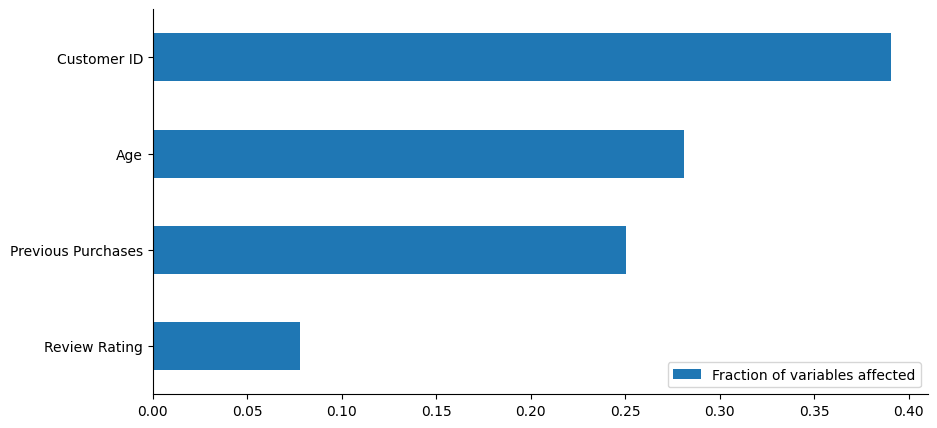

In [52]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : model_rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

**# Step8: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [53]:
# make predictions on the test data
y_predict = model_rf.predict(X_test)

In [54]:
#Evaluate the performance of model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          20       0.00      0.00      0.00         7
          21       0.00      0.00      0.00        10
          22       0.00      0.00      0.00         5
          23       0.14      0.08      0.11        12
          24       0.00      0.00      0.00         5
          25       0.00      0.00      0.00         8
          26       0.00      0.00      0.00        12
          27       0.00      0.00      0.00         5
          28       0.00      0.00      0.00        14
          29       0.00      0.00      0.00        11
          30       0.00      0.00      0.00        10
          31       0.00      0.00      0.00         9
          32       0.00      0.00      0.00        11
          33       0.00      0.00      0.00        12
          34       0.00      0.00      0.00         7
          35       0.00      0.00      0.00         7
          36       0.00      0.00      0.00        13
          37       0.00    

In [55]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**# Step8.2: Testing and Evaluating the Performance of SVM Model (ทดสอบประสิทธิภาพของ Model)**

In [56]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [57]:
ySVM_predict = model_svm.predict(X_test)

In [58]:
print(classification_report(y_test, ySVM_predict))

              precision    recall  f1-score   support

          20       0.00      0.00      0.00         7
          21       0.00      0.00      0.00        10
          22       0.00      0.00      0.00         5
          23       0.10      0.17      0.12        12
          24       0.00      0.00      0.00         5
          25       0.02      0.25      0.04         8
          26       0.00      0.00      0.00        12
          27       0.00      0.00      0.00         5
          28       0.05      0.07      0.06        14
          29       0.00      0.00      0.00        11
          30       0.00      0.00      0.00        10
          31       0.00      0.00      0.00         9
          32       0.03      0.36      0.05        11
          33       0.00      0.00      0.00        12
          34       0.00      0.00      0.00         7
          35       0.00      0.00      0.00         7
          36       0.02      0.08      0.03        13
          37       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
cm_SVM = confusion_matrix(y_test, ySVM_predict)
print(cm_SVM)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


**# Step8.3: Testing and Evaluating the Performance of KNN Model (ทดสอบประสิทธิภาพของ Model)**

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
yKNN_predict = model_knn.predict(X_test)

In [62]:
print(classification_report(y_test, yKNN_predict))

              precision    recall  f1-score   support

          20       0.02      0.14      0.04         7
          21       0.00      0.00      0.00        10
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00        12
          24       0.00      0.00      0.00         5
          25       0.00      0.00      0.00         8
          26       0.00      0.00      0.00        12
          27       0.03      0.20      0.06         5
          28       0.00      0.00      0.00        14
          29       0.00      0.00      0.00        11
          30       0.04      0.10      0.05        10
          31       0.00      0.00      0.00         9
          32       0.00      0.00      0.00        11
          33       0.00      0.00      0.00        12
          34       0.00      0.00      0.00         7
          35       0.00      0.00      0.00         7
          36       0.09      0.15      0.11        13
          37       0.05    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
cm_KNN = confusion_matrix(y_test, yKNN_predict)
print(cm_KNN)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
# ROC curve
from sklearn.metrics import roc_curve
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [67]:
# AUC score

# from sklearn.metrics import roc_auc_score

# auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
# auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
# auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])

# print("Support Vector Machine: ", auc_score2) # Support Vector Machine
# print("Random Forest: ", auc_score3) # Random Forest
# print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors

In [ ]:
# plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
# plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
# plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")

# plt.title('Receiver Operator Characteristics (ROC)')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive rate')

# plt.legend(loc = 'best')
# plt.savefig('ROC', dpi = 300)
# plt.show()

**# Step9: Deployment โดยทำการ Save AI Model ที่ได้ เพื่อนำไปใช้ในการ deployement กับข้อมูลชุดใหม่ ที่ไม่ทราบค่า Output (ให้ Model Predict output)**

In [68]:
# loading library
import pickle

In [69]:
# create an iterator object with write permission - model.pickle and save model
with open('model_rf', 'wb') as files:
    pickle.dump(model_rf, files)

In [70]:
# load saved model
with open('model_rf' , 'rb') as f:
    lr = pickle.load(f)

In [71]:
# นำข้อมูลชุดใหม่มาทำการ prediction
#จากตัวอย่างเลือกเอาข้อมูล 5 แถวจากตัวแปร X มาใช้ในการ deployment
deploy_df = X[11:20]

deploy_df

,Customer ID,Age,Review Rating,Previous Purchases
14,15,64,4,34
15,16,64,2,8
16,17,25,4,44
18,19,52,4,17
19,20,66,3,46
20,21,21,2,50
21,22,31,4,22
22,23,56,3,32
23,24,31,4,40


In [72]:
#ใช้ model ที่ load มาทำการ predict ข้อมูลชุดใหม่
deploy_Y = lr.predict(deploy_df)
deploy_Y


array([53, 85, 36, 37, 90, 51, 68, 37, 88])

In [73]:
deploy_arr=deploy_Y.reshape((-1, 1))

In [74]:
deploy_arr.shape

(9, 1)

In [75]:
deploy_df.shape

(9, 4)

In [76]:
#แสดงผลลัพธ์ที่ได้จากการ deployment ของข้อมูลชุดใหม่
pd.DataFrame(np.concatenate((deploy_arr, deploy_df), axis=1))

,0,1,2,3,4
0,53,15,64,4,34
1,85,16,64,2,8
2,36,17,25,4,44
3,37,19,52,4,17
4,90,20,66,3,46
5,51,21,21,2,50
6,68,22,31,4,22
7,37,23,56,3,32
8,88,24,31,4,40
